In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib


In [21]:
# Define the path to the Excel file
df = pd.read_excel(r"F:\DWL\Power BI Projects\Customer Churn Analysis Porject 1\Prediction Data.xlsx", sheet_name = "vw_ChurnData")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customer_id                  6007 non-null   object 
 1   gender                       6007 non-null   object 
 2   age                          6007 non-null   int64  
 3   married                      6007 non-null   int64  
 4   state                        6007 non-null   object 
 5   number_of_referrals          6007 non-null   int64  
 6   tenure_in_months             6007 non-null   int64  
 7   value_deal                   2710 non-null   object 
 8   phone_service                6007 non-null   int64  
 9   multiple_lines               6007 non-null   int64  
 10  internet_service             6007 non-null   int64  
 11  internet_type                4784 non-null   object 
 12  online_security              6007 non-null   int64  
 13  online_backup     

In [24]:
# Display the first few rows of the fetched data
print(df.head())

  customer_id  gender  age  married        state  number_of_referrals  \
0   19877-DEL    Male   35        0        Delhi                    7   
1   58353-MAH  Female   45        1  Maharashtra                   14   
2   25063-WES    Male   51        0  West Bengal                    4   
3   59787-KAR    Male   79        0    Karnataka                    3   
4   28544-TAM  Female   80        0   Tamil Nadu                    3   

   tenure_in_months value_deal  phone_service  multiple_lines  ...  \
0                27        NaN              1               0  ...   
1                13        NaN              1               1  ...   
2                35     Deal 5              1               0  ...   
3                21     Deal 4              1               0  ...   
4                 8        NaN              1               0  ...   

    payment_method monthly_charge  total_charges  total_refunds  \
0      Credit Card           65.6         593.30           0.00   
1     

In [27]:
# Drop columns that won't be used for prediction
df.drop(['customer_id', 'churn_category','churn_reason'], axis=1, inplace=True)

In [28]:
print(df.head())

   gender  age  married        state  number_of_referrals  tenure_in_months  \
0    Male   35        0        Delhi                    7                27   
1  Female   45        1  Maharashtra                   14                13   
2    Male   51        0  West Bengal                    4                35   
3    Male   79        0    Karnataka                    3                21   
4  Female   80        0   Tamil Nadu                    3                 8   

  value_deal  phone_service  multiple_lines  internet_service  ...  \
0        NaN              1               0                 1  ...   
1        NaN              1               1                 1  ...   
2     Deal 5              1               0                 1  ...   
3     Deal 4              1               0                 1  ...   
4        NaN              1               0                 1  ...   

         contract  paperless_billing   payment_method  monthly_charge  \
0        One Year              

In [32]:
#Data Preprocessing
# List of columns to be label encoded
columns_to_encode = [
    'gender', 'married', 'state', 'value_deal', 'phone_service', 'multiple_lines',
    'internet_service', 'internet_type', 'online_security', 'online_backup',
    'device_protection_plan', 'premium_support', 'streaming_tv', 'streaming_movies',
    'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',
    'payment_method'
]

# Encode categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])
    
# Manually encode the target variable 'Customer_Status'
df['customer_status'] = df['customer_status'].map({'Stayed': 0, 'Churned': 1})

# Split data into features and target
X = df.drop('customer_status', axis=1)
y = df['customer_status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Train Random Forest Model
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Confusion Matrix:
[[792  46]
 [148 216]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       838
           1       0.82      0.59      0.69       364

    accuracy                           0.84      1202
   macro avg       0.83      0.77      0.79      1202
weighted avg       0.84      0.84      0.83      1202



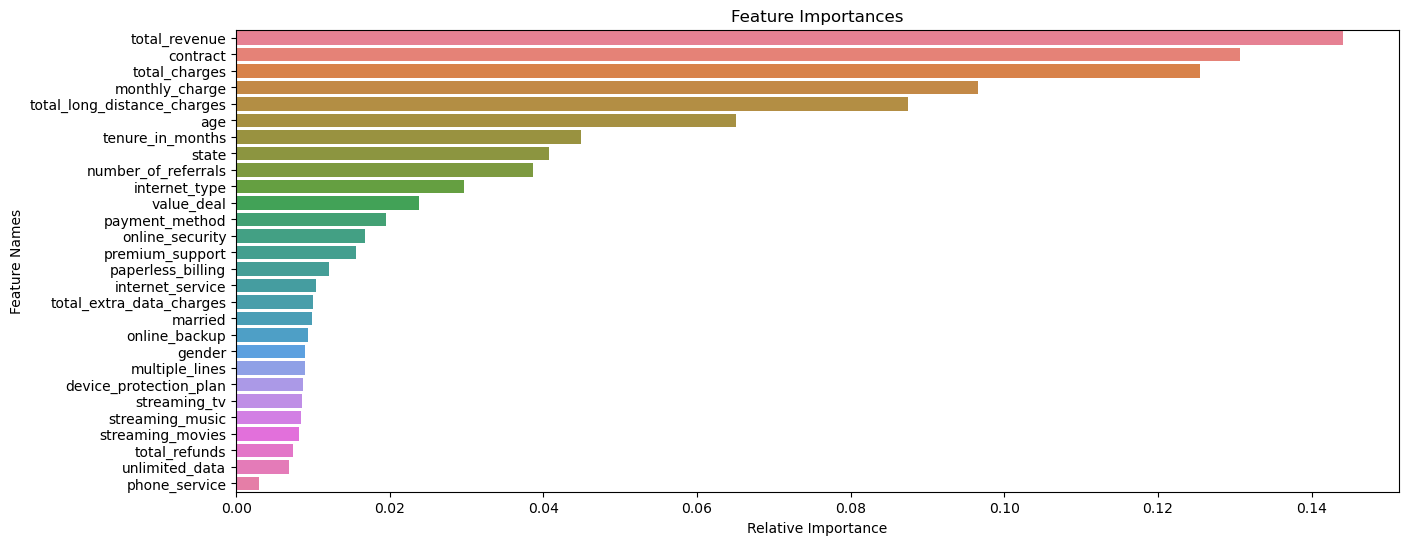

In [36]:
#Evaluate Model
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices], hue = X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

In [41]:
# Use Model for Prediction on New Data
# Define the path to the Joiner Data Excel file
Newdf= pd.read_excel(r"F:\DWL\Power BI Projects\Customer Churn Analysis Porject 1\Prediction Data.xlsx", sheet_name = "vw_JoinData")

# Display the first few rows of the fetched data
print(Newdf.head())

# Retain the original DataFrame to preserve unencoded columns
original_data = Newdf.copy()

# Retain the Customer_ID column
customer_ids = Newdf['customer_id']

# Drop columns that won't be used for prediction in the encoded DataFrame
Newdf = Newdf.drop(['customer_id', 'customer_status', 'churn_category', 'churn_reason'], axis=1)

# Encode categorical variables using the saved label encoders
label_encoders = {col: LabelEncoder().fit(Newdf[col].astype(str)) 
for col in Newdf.select_dtypes(include=['object']).columns}
Newdf[Newdf.select_dtypes(include=['object']).columns] = Newdf[Newdf.select_dtypes(include=['object']).columns].apply(lambda x: label_encoders[x.name].transform(x.astype(str)))

#for column in Newdf.select_dtypes(include=['object']).columns:
#Newdf[column] = label_encoders[column].transform(Newdf[column].astype(str))

# Make predictions
new_predictions = rf_model.predict(Newdf)

# Add predictions to the original DataFrame
original_data['customer_status_predicted'] = new_predictions

# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['customer_status_predicted'] == 1]

# Save the results
original_data.to_csv(r"F:\DWL\Power BI Projects\Customer Churn Analysis Porject 1\Predictions.csv", index=False)

  customer_id  gender  age  married           state  number_of_referrals  \
0   93520-GUJ  Female   67        0         Gujarat                   13   
1   57256-BIH  Female   18        0           Bihar                    9   
2   72357-MAD  Female   53        0  Madhya Pradesh                   14   
3   66612-KAR  Female   58        1       Karnataka                   11   
4   22119-WES    Male   31        1     West Bengal                    5   

   tenure_in_months value_deal  phone_service  multiple_lines  ...  \
0                19     Deal 5              1               1  ...   
1                 7        NaN              1               0  ...   
2                12     Deal 5              1               0  ...   
3                18        NaN              1               0  ...   
4                 5        NaN              1               0  ...   

    payment_method monthly_charge  total_charges  total_refunds  \
0  Bank Withdrawal          72.10           72.1       